<a href="https://colab.research.google.com/github/eospgonz10/statistical_analytics_homicide/blob/main/sesiones_practicas/sp_1_juan_jose_garcia_alvarez_estiven_ospina_gonzalez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <span style="color:Black;"><strong>1. Introducción</strong></span>

<div style="background-color:#E6F4FF; padding:10px; border-radius:8px;">
<b>1. Breve presentación del problema o pregunta de investigación.</b>  
</div>

¿Qué factores sociales, demográficos y geográficos influyen en las tendencias de homicidios en Estados Unidos?

<br>
<div style="background-color:#E8F5E9; padding:10px; border-radius:8px;">
<b> 2. Contexto: ¿por qué es relevante este problema?</b>  
</div>

Los **homicidios** constituyen una de las principales causas de mortalidad prevenible en Estados Unidos, con profundas implicaciones sociales, económicas y de salud pública. Más allá de las cifras, este fenómeno puede refleja desigualdades estructurales y vulnerabilidades en segmentos específicos de la población.

Comprender qué factores influyen en las tendencias de homicidios es relevante por varias razones:

- **Vulnerabilidad geográfica**: Existen zonas marginadas y con menor acceso a servicios de seguridad y bienestar donde la incidencia de homicidios es significativamente mayor.
- **Disparidades demográficas**: Ciertos grupos étnicos y por sexo pueden presentarse víctimas en proporciones desequilibradas, lo que requiere análisis diferenciado.
- **Factores etarios**: Las edades vulnerables varían según contextos geográficos y sociales, indicando diferentes dinámicas de violencia.
- **Patrones espaciales y temporales**: Identificar patrones permite anticipar y prevenir concentraciones de violencia en zonas específicas.

La literatura ha reconocido que factores como la **pobreza**, el **desempleo**, la **segregación racial**, el **acceso a armas**, la **estructura demográfica** y la **densidad poblacional** inciden en las tasas de homicidios, pero su interacción y peso relativo aún merece análisis actualizados.

<div style="background-color:#FFF9C4; padding:10px; border-radius:8px;">
<b> 3. Relación entre el problema y la base de datos seleccionada. </b>  
</div>

Para abordar esta pregunta de investigación, utilizamos una base de datos compilada de registros de homicidios en Estados Unidos, disponible en la plataforma **[Kaggle](https://www.kaggle.com/code/harshilahalpara/homicide)**. Este dataset recopila información detallada de casos de homicidios, incluyendo:

- **Variables geográficas**: Estado, ciudad y otras ubicaciones que permiten identificar zonas de concentración.
- **Variables demográficas**: Género y etnia de las víctimas.
- **Variables temporales**: Año, mes y día del evento, para identificar patrones estacionales y tendencias.
- **Características contextuales**: Información sobre el tipo de arma, circunstancias del evento y otras variables que proporcionan contexto sobre la naturaleza de los homicidios.

Esta información nos permite no solo cuantificar las tendencias globales de homicidios, sino también desagrupar el análisis por regiones, grupos demográficos y períodos temporales, facilitando la identificación de vulnerabilidades específicas.

In [4]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo general
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Crear dataset
df = pd.read_csv("../data/database.csv")

C:\Users\GARCIA\AppData\Local\Temp\ipykernel_1772\3261680054.py:11: DtypeWarning: Columns (0: Perpetrator Age) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/database.csv")


<Figure size 1200x600 with 0 Axes>

# <span style="color:Black;"><strong>2. Descripción de la base de datos</strong></span>

In [6]:
df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [7]:
# Número de registros y variables
print(f"Número de registros: {df.shape[0]}")
print(f"Número de variables: {df.shape[1]}")

Número de registros: 638454
Número de variables: 24


In [8]:
# Clasificación de variables
categoricas = df.select_dtypes(include=['object']).columns.tolist()
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("🔹 Variables categóricas:")
print("\n".join([f"- {col}" for col in categoricas]))

print("\n🔸 Variables numéricas:")
print("\n".join([f"- {col}" for col in numericas]))

🔹 Variables categóricas:
- Agency Code
- Agency Name
- Agency Type
- City
- State
- Month
- Crime Type
- Crime Solved
- Victim Sex
- Victim Race
- Victim Ethnicity
- Perpetrator Sex
- Perpetrator Age
- Perpetrator Race
- Perpetrator Ethnicity
- Relationship
- Weapon
- Record Source

🔸 Variables numéricas:
- Record ID
- Year
- Incident
- Victim Age
- Victim Count
- Perpetrator Count


C:\Users\GARCIA\AppData\Local\Temp\ipykernel_1772\2670419239.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categoricas = df.select_dtypes(include=['object']).columns.tolist()


In [9]:
# Descripción general
print("\nDescripción de variables numéricas:")
print(df.describe())


Descripción de variables numéricas:
          Record ID           Year       Incident     Victim Age  \
count  638454.00000  638454.000000  638454.000000  638454.000000   
mean   319227.50000    1995.801102      22.967924      35.033512   
std    184305.93872       9.927693      92.149821      41.628306   
min         1.00000    1980.000000       0.000000       0.000000   
25%    159614.25000    1987.000000       1.000000      22.000000   
50%    319227.50000    1995.000000       2.000000      30.000000   
75%    478840.75000    2004.000000      10.000000      42.000000   
max    638454.00000    2014.000000     999.000000     998.000000   

        Victim Count  Perpetrator Count  
count  638454.000000      638454.000000  
mean        0.123334           0.185224  
std         0.537733           0.585496  
min         0.000000           0.000000  
25%         0.000000           0.000000  
50%         0.000000           0.000000  
75%         0.000000           0.000000  
max        10.

#<span style="color:Black;"><strong>3. Análisis inicial de variables</strong></span>

In [10]:
# Conteo de valores faltantes ordenado de mayor a menor
faltantes = df.isnull().sum().sort_values(ascending=False)

print("\nConteo de valores faltantes por variable:")
print(faltantes[faltantes > 0])  # Solo muestra variables con al menos un valor faltante

# Detectar "Unknown" en categóricas
unknown_counts = (df == "Unknown").sum().sort_values(ascending=False)
print(unknown_counts[unknown_counts > 0])

# Detectar 0 en Perpetrator Age (edad imposible en contexto real)
print(f"Perpetrator Age = 0: {(df['Perpetrator Age'] == '0').sum()}")


Conteo de valores faltantes por variable:
Series([], dtype: int64)
Perpetrator Ethnicity    446410
Victim Ethnicity         368303
Relationship             273013
Perpetrator Race         196047
Perpetrator Sex          190365
Weapon                    33192
Victim Race                6676
Victim Sex                  984
Agency Name                  47
dtype: int64
Perpetrator Age = 0: 5248


In [11]:
# Conteo de valores únicos por variable
print("\nConteo de valores únicos por variable:")
print(df.nunique().sort_values(ascending=False))


Conteo de valores únicos por variable:
Record ID                638454
Agency Code               12003
Agency Name                9216
City                       1782
Incident                   1000
Perpetrator Age             191
Victim Age                  101
State                        51
Year                         35
Relationship                 28
Weapon                       16
Month                        12
Perpetrator Count            11
Victim Count                 11
Agency Type                   7
Victim Race                   5
Perpetrator Race              5
Victim Sex                    3
Perpetrator Sex               3
Victim Ethnicity              3
Perpetrator Ethnicity         3
Crime Solved                  2
Crime Type                    2
Record Source                 2
dtype: int64


In [12]:
# Variables más importantes
variables_clave = ['City', 'Incident', 'State', 'Year', 'Relationship', 'Weapon', 'Crime Solved', 'Crime Type', 'Perpetrator Age', 'Victim Age',  'Perpetrator Count', 'Victim Count', 'Perpetrator Race', 'Victim Race', 'Perpetrator Sex', 'Victim Sex']
print("\nVista rápida de variables clave:")
print(df[variables_clave].head())
# Vista rápida de las variables clave
print("\nEstadísticas descriptivas de variables clave:")
print(df[variables_clave].describe())


Vista rápida de variables clave:
        City  Incident   State  Year  Relationship         Weapon  \
0  Anchorage         1  Alaska  1980  Acquaintance   Blunt Object   
1  Anchorage         1  Alaska  1980  Acquaintance  Strangulation   
2  Anchorage         2  Alaska  1980       Unknown        Unknown   
3  Anchorage         1  Alaska  1980  Acquaintance  Strangulation   
4  Anchorage         2  Alaska  1980       Unknown        Unknown   

  Crime Solved              Crime Type Perpetrator Age  Victim Age  \
0          Yes  Murder or Manslaughter              15          14   
1          Yes  Murder or Manslaughter              42          43   
2           No  Murder or Manslaughter               0          30   
3          Yes  Murder or Manslaughter              42          43   
4           No  Murder or Manslaughter               0          30   

   Perpetrator Count  Victim Count               Perpetrator Race  \
0                  0             0  Native American/Alaska Na

# <span style="color:Black;"><strong>4. Visualizaciones exploratorias</strong></span>

## 4.1 Distribución de variables numéricas

Histogramas para explorar la forma, rango y posibles valores atípicos de las variables numéricas principales.

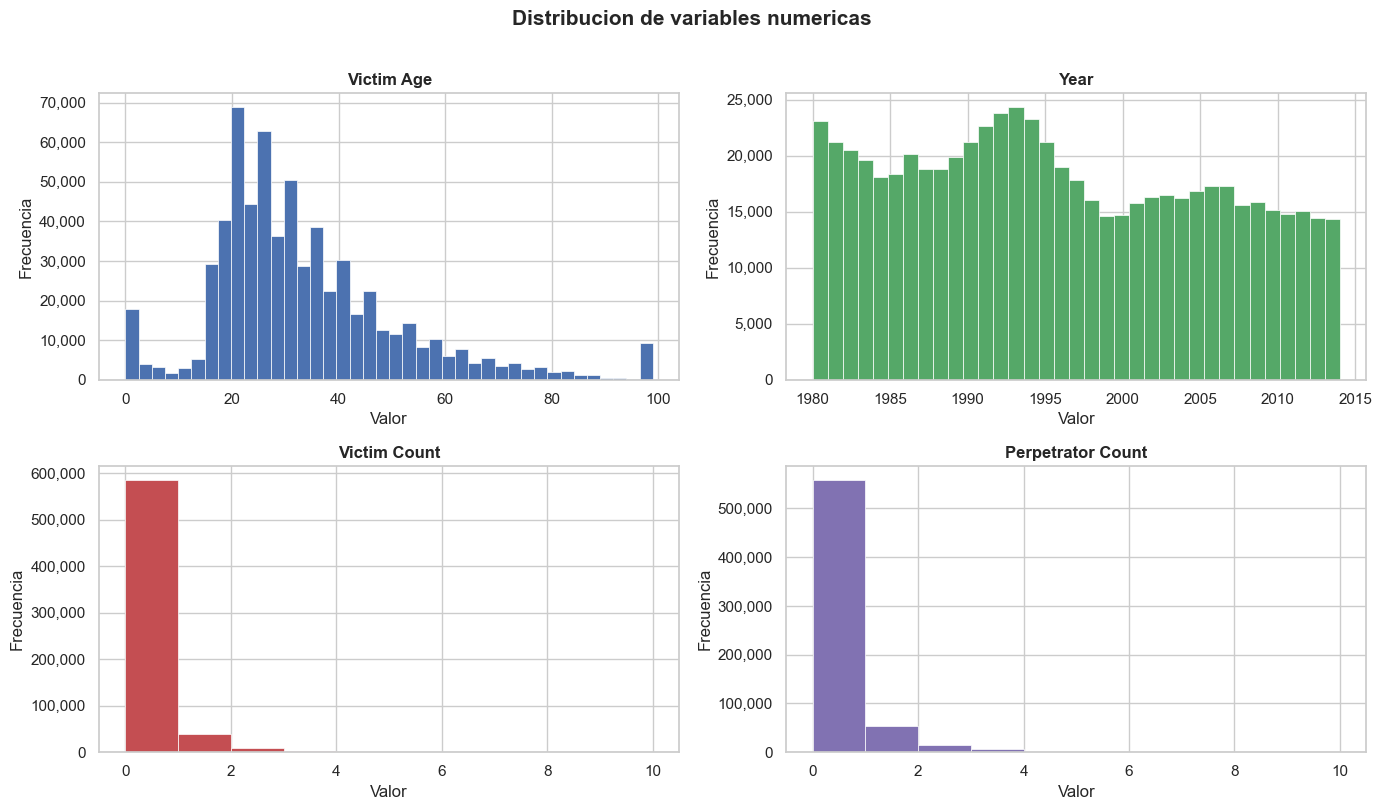

In [18]:
import warnings
warnings.filterwarnings("ignore")

numericas_plot = ["Victim Age", "Year", "Victim Count", "Perpetrator Count"]
colores = ["#4C72B0", "#55A868", "#C44E52", "#8172B2"]
# Definimos un número diferente de bins para cada gráfica
bins_por_variable = {
    "Victim Age": 40,
    "Year": 35,
    "Victim Count": 10,
    "Perpetrator Count": 10,
}

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle("Distribucion de variables numericas", fontsize=15, fontweight="bold", y=1.01)

for ax, col, color in zip(axes.flatten(), numericas_plot, colores):
    datos = df[col].copy()
    if col == "Victim Age":
        datos = datos[datos < 100]
    ax.hist(datos.dropna(), bins=bins_por_variable[col], color=color, edgecolor="white", linewidth=0.5)
    ax.set_title(col, fontsize=12, fontweight="bold")
    ax.set_xlabel("Valor")
    ax.set_ylabel("Frecuencia")
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.tight_layout()
plt.show()

## 4.2 Tendencia temporal de homicidios (1980-2014)

Serie de tiempo que muestra la evolucion anual del numero de casos registrados.

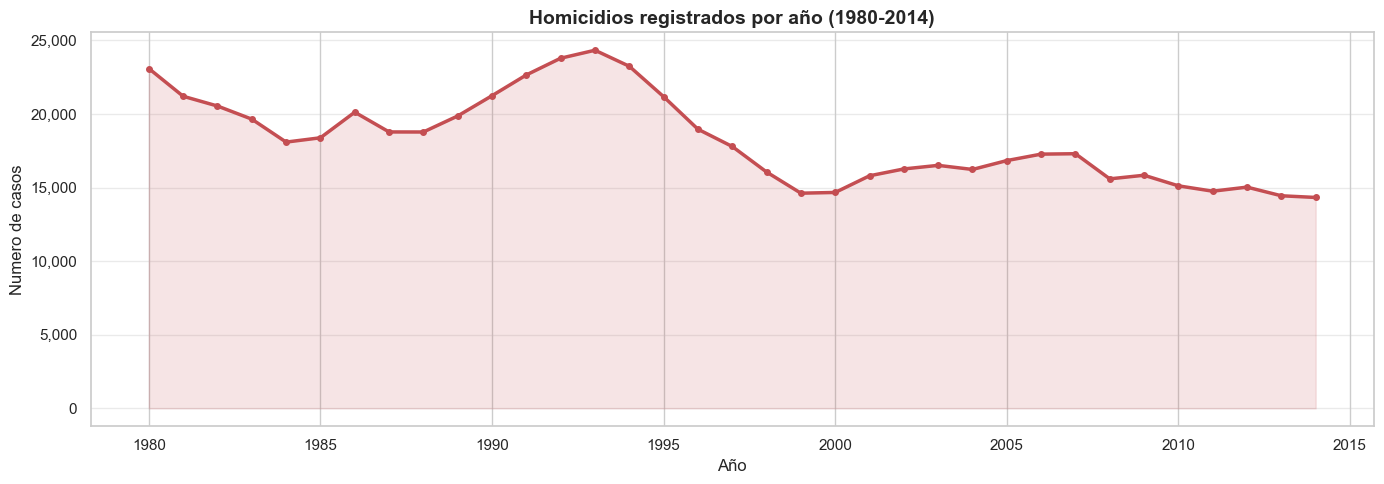

In [19]:
homicidios_por_anio = df.groupby("Year").size().reset_index(name="Total")

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(homicidios_por_anio["Year"], homicidios_por_anio["Total"],
        color="#C44E52", linewidth=2.5, marker="o", markersize=4)
ax.fill_between(homicidios_por_anio["Year"], homicidios_por_anio["Total"],
                alpha=0.15, color="#C44E52")
ax.set_title("Homicidios registrados por año (1980-2014)", fontsize=14, fontweight="bold")
ax.set_xlabel("Año")
ax.set_ylabel("Numero de casos")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.grid(axis="y", alpha=0.4)
plt.tight_layout()
plt.show()

## 4.3 Distribucion geografica - Top 10 estados con mas homicidios

Grafico de barras horizontales para identificar la concentracion geografica de los casos.

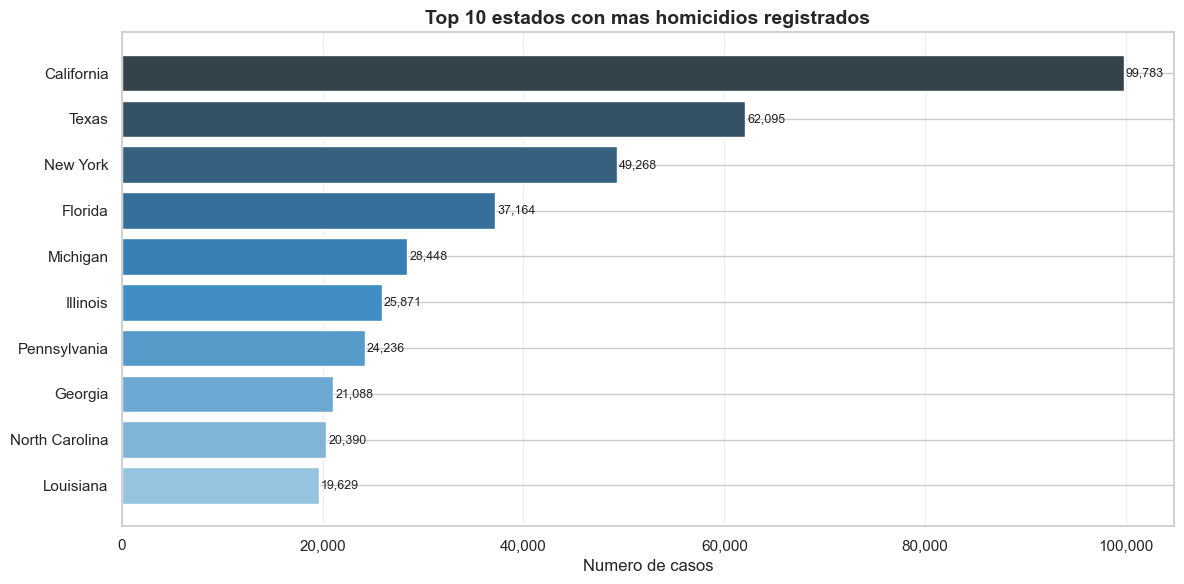

In [20]:
top_estados = df["State"].value_counts().head(10).reset_index()
top_estados.columns = ["State", "Total"]

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(top_estados["State"][::-1], top_estados["Total"][::-1],
               color=sns.color_palette("Blues_d", 10))
ax.set_title("Top 10 estados con mas homicidios registrados", fontsize=14, fontweight="bold")
ax.set_xlabel("Numero de casos")
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
for bar in bars:
    width = bar.get_width()
    ax.text(width + 200, bar.get_y() + bar.get_height()/2,
            f"{int(width):,}", va="center", fontsize=9)
ax.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

## 4.4 Distribucion demografica - Sexo de victimas y perpetradores

Comparacion lado a lado del genero, incluyendo registros "Unknown".

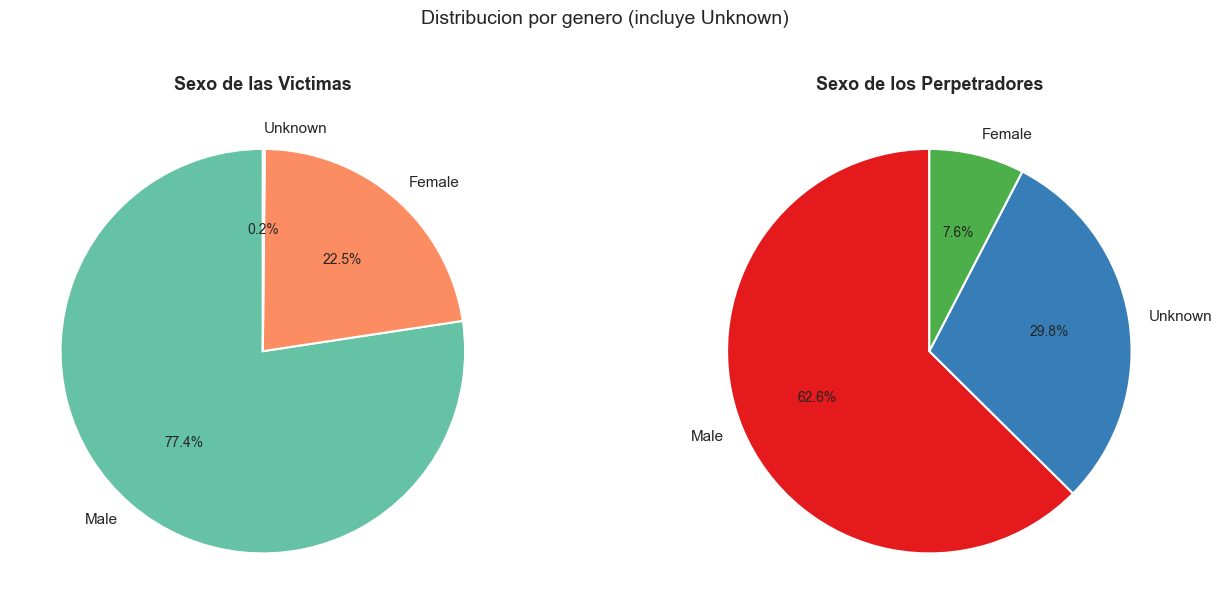

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

pares = [
    ("Victim Sex",      "Sexo de las Victimas",      "Set2"),
    ("Perpetrator Sex", "Sexo de los Perpetradores", "Set1"),
]

for ax, (col, titulo, palette) in zip(axes, pares):
    conteo = df[col].value_counts()
    colores = sns.color_palette(palette, len(conteo))
    wedges, texts, autotexts = ax.pie(
        conteo, labels=conteo.index, autopct="%1.1f%%",
        colors=colores, startangle=90,
        wedgeprops={"edgecolor": "white", "linewidth": 1.5}
    )
    for at in autotexts:
        at.set_fontsize(10)
    ax.set_title(titulo, fontsize=13, fontweight="bold")

plt.suptitle("Distribucion por genero (incluye Unknown)", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 4.5 Distribucion por raza - Victimas vs Perpetradores

Grafico de barras agrupadas para comparar la composicion racial.

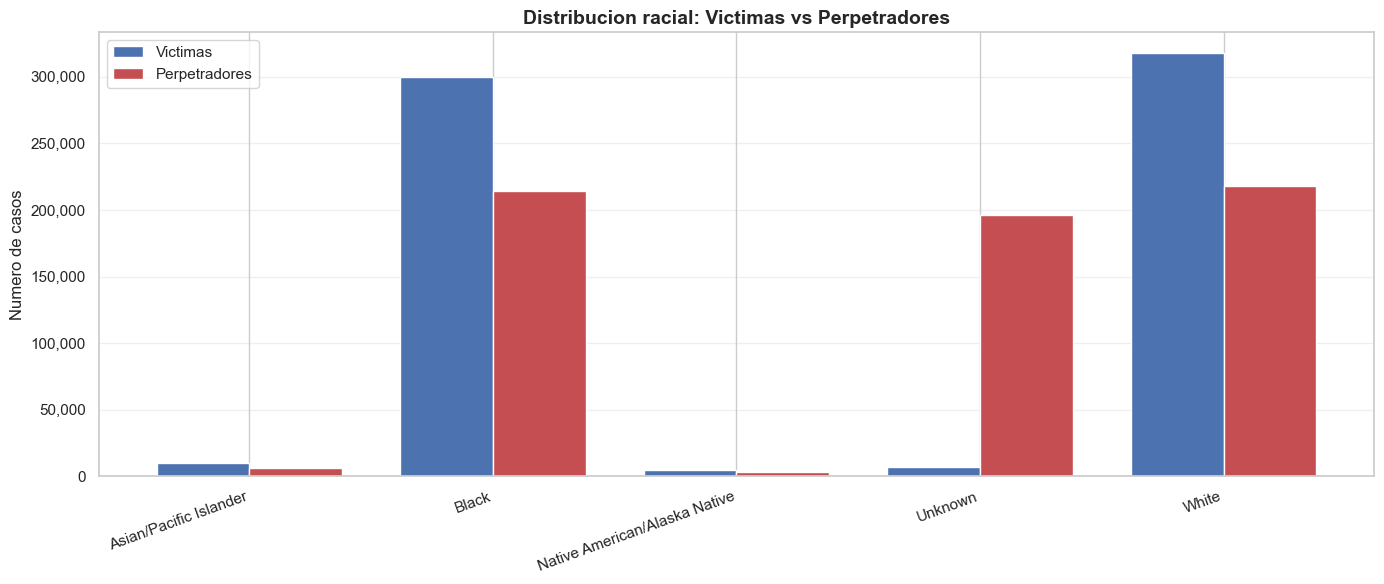

In [22]:
import numpy as np

raza_victima = df["Victim Race"].value_counts()
raza_perp    = df["Perpetrator Race"].value_counts()

razas = sorted(set(raza_victima.index) | set(raza_perp.index))
v_vals = [raza_victima.get(r, 0) for r in razas]
p_vals = [raza_perp.get(r, 0)    for r in razas]

x = np.arange(len(razas))
width = 0.38

fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(x - width/2, v_vals, width, label="Victimas",      color="#4C72B0", edgecolor="white")
ax.bar(x + width/2, p_vals, width, label="Perpetradores", color="#C44E52", edgecolor="white")
ax.set_xticks(x)
ax.set_xticklabels(razas, rotation=20, ha="right")
ax.set_title("Distribucion racial: Victimas vs Perpetradores", fontsize=14, fontweight="bold")
ax.set_ylabel("Numero de casos")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.legend()
ax.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

## 4.6 Armas mas utilizadas

Top 10 tipos de armas empleadas en los homicidios (excluye Unknown).

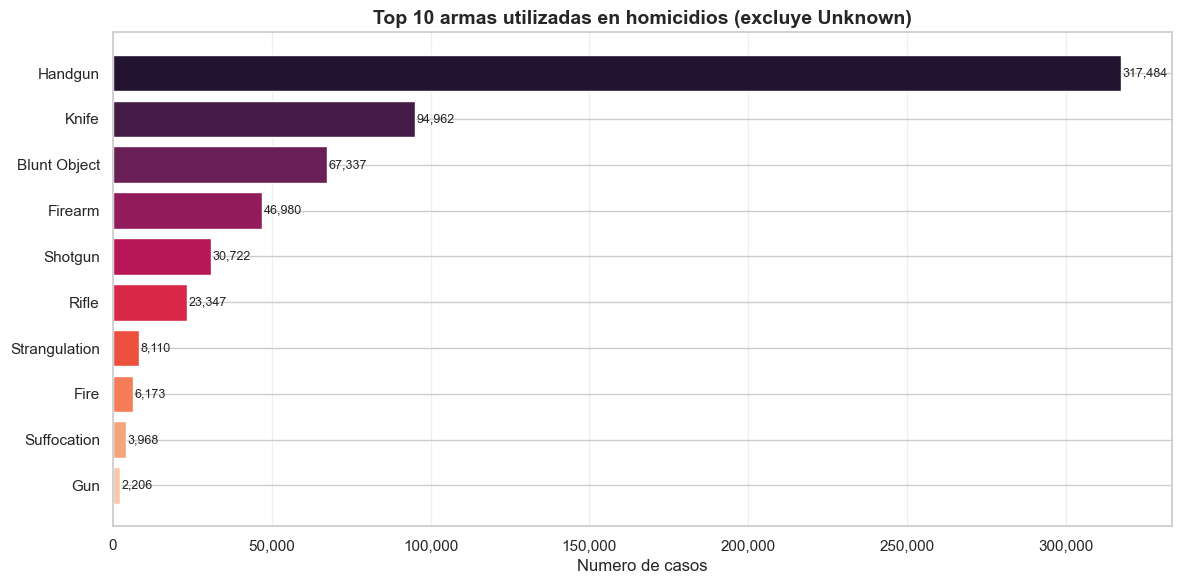

In [23]:
armas = df[df["Weapon"] != "Unknown"]["Weapon"].value_counts().head(10)

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(armas.index[::-1], armas.values[::-1],
               color=sns.color_palette("rocket_r", 10))
ax.set_title("Top 10 armas utilizadas en homicidios (excluye Unknown)", fontsize=14, fontweight="bold")
ax.set_xlabel("Numero de casos")
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
for bar in bars:
    width = bar.get_width()
    ax.text(width + 500, bar.get_y() + bar.get_height()/2,
            f"{int(width):,}", va="center", fontsize=9)
ax.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

## 4.7 Dispersion - Edad victima vs Edad perpetrador

Explora si existe correlacion entre las edades de victima e imputado. Se filtran valores centinela (edad 0 y >= 100). Muestra de 5,000 casos.

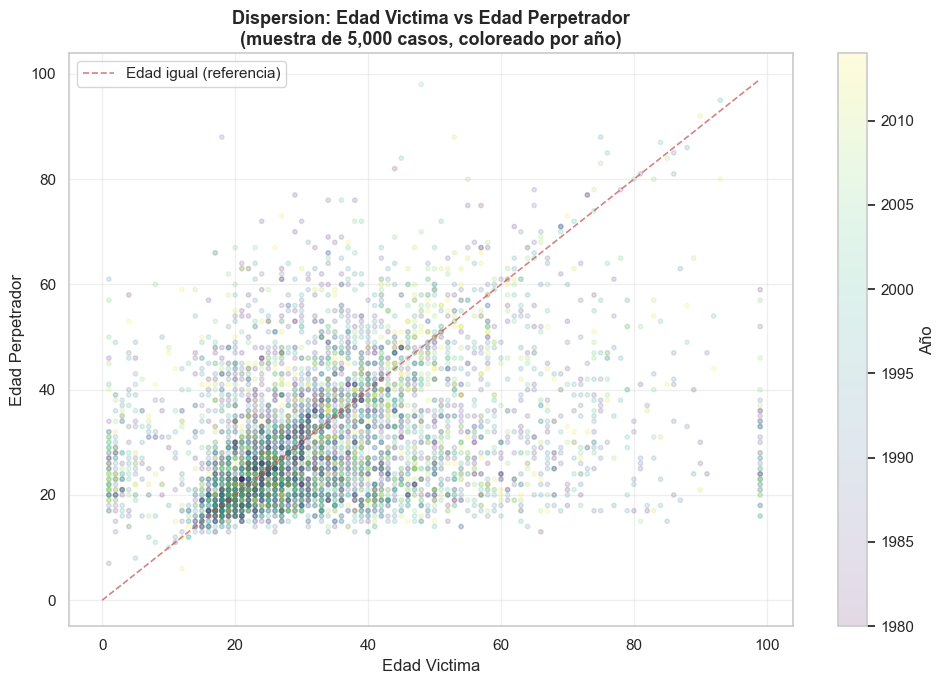

In [24]:
df_scatter = df.copy()
df_scatter["Perpetrator Age"] = pd.to_numeric(df_scatter["Perpetrator Age"], errors="coerce")

mask = (
    df_scatter["Victim Age"].between(1, 99) &
    df_scatter["Perpetrator Age"].between(1, 99)
)
df_plot = df_scatter[mask].sample(5000, random_state=42)

fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(
    df_plot["Victim Age"], df_plot["Perpetrator Age"],
    alpha=0.15, s=10, c=df_plot["Year"], cmap="viridis"
)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Año")
ax.plot([0, 99], [0, 99], "r--", linewidth=1.2, alpha=0.7, label="Edad igual (referencia)")
ax.set_title("Dispersion: Edad Victima vs Edad Perpetrador\n(muestra de 5,000 casos, coloreado por año)",
             fontsize=13, fontweight="bold")
ax.set_xlabel("Edad Victima")
ax.set_ylabel("Edad Perpetrador")
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 4.8 Tasa de resolucion de crimenes por año

Evolucion temporal del porcentaje de casos resueltos (Crime Solved = Yes).

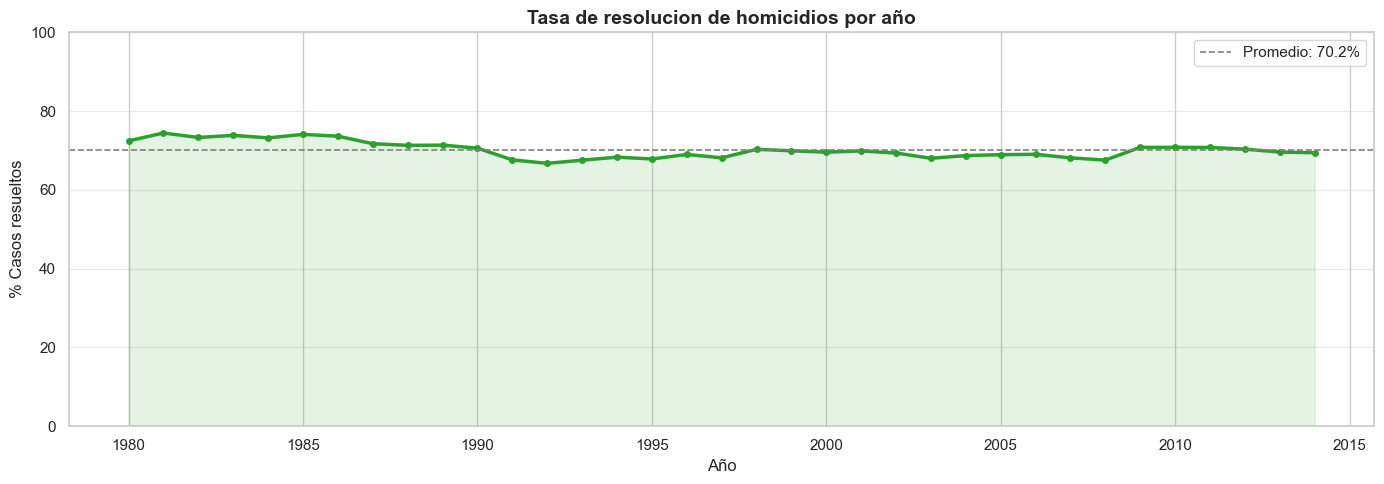

In [25]:
resolucion = df.groupby("Year")["Crime Solved"].apply(
    lambda x: (x == "Yes").sum() / len(x) * 100
).reset_index(name="Tasa_Resolucion")

promedio = resolucion["Tasa_Resolucion"].mean()

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(resolucion["Year"], resolucion["Tasa_Resolucion"],
        color="#2ca02c", linewidth=2.5, marker="o", markersize=4)
ax.fill_between(resolucion["Year"], resolucion["Tasa_Resolucion"],
                alpha=0.12, color="#2ca02c")
ax.axhline(y=promedio, color="gray", linestyle="--", linewidth=1.2,
           label=f"Promedio: {promedio:.1f}%")
ax.set_title("Tasa de resolucion de homicidios por año", fontsize=14, fontweight="bold")
ax.set_xlabel("Año")
ax.set_ylabel("% Casos resueltos")
ax.set_ylim(0, 100)
ax.legend()
ax.grid(axis="y", alpha=0.4)
plt.tight_layout()
plt.show()

## 4.9 Mapa de calor - Homicidios por Mes y Año

Heatmap para identificar patrones estacionales y temporales combinados.

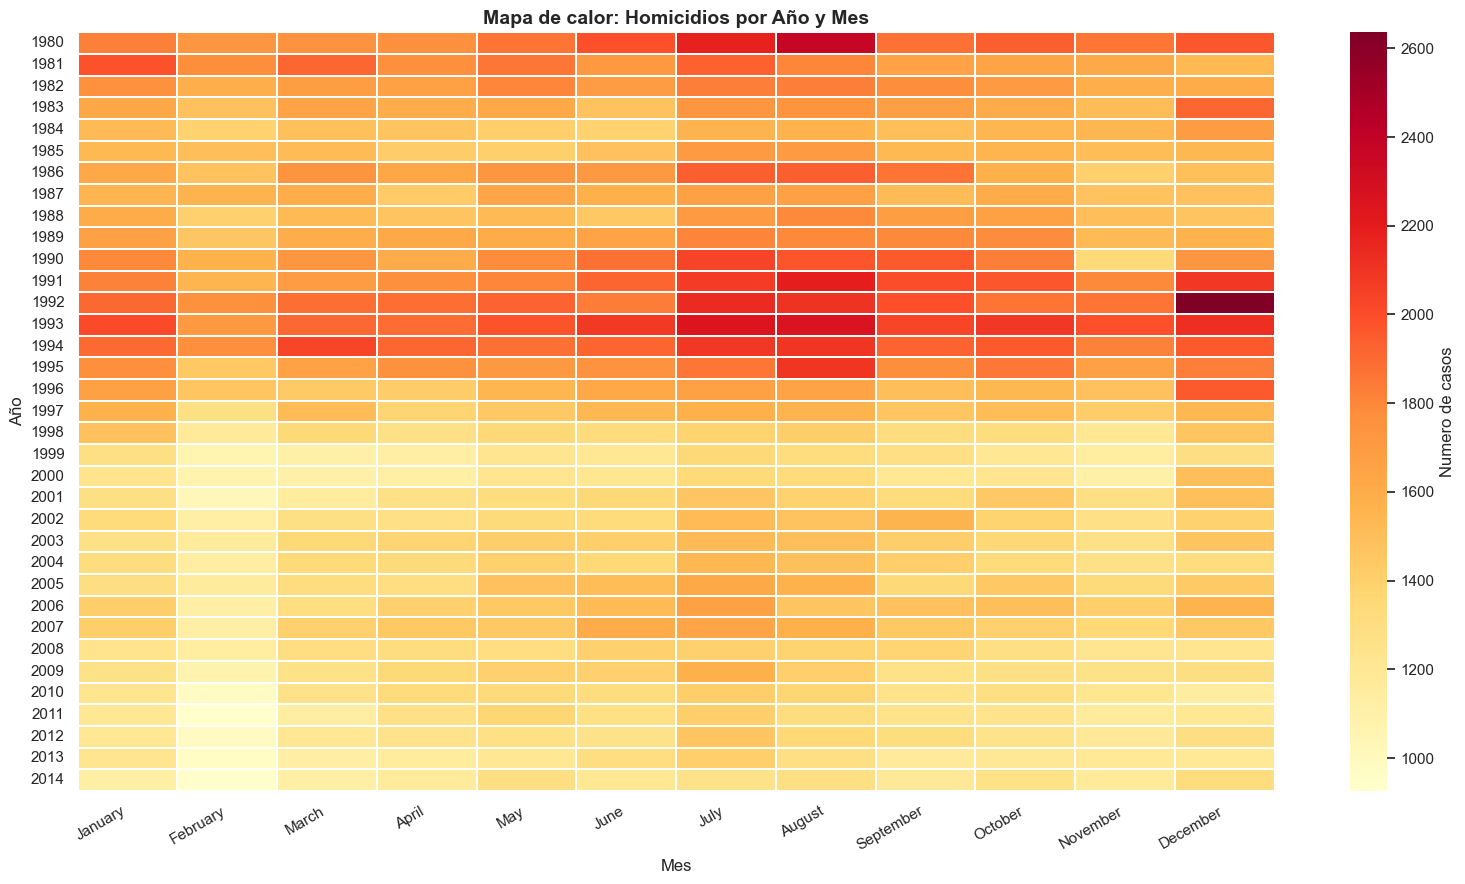

In [26]:
orden_meses = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]

pivot = df.groupby(["Year","Month"]).size().unstack(fill_value=0)
pivot = pivot[[m for m in orden_meses if m in pivot.columns]]

fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(pivot, cmap="YlOrRd", linewidths=0.3, linecolor="white",
            ax=ax, cbar_kws={"label": "Numero de casos"})
ax.set_title("Mapa de calor: Homicidios por Año y Mes", fontsize=14, fontweight="bold")
ax.set_xlabel("Mes")
ax.set_ylabel("Año")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

## 4.10 Relacion entre victima y perpetrador

Top 10 tipos de relacion para entender el contexto social de los homicidios (excluye Unknown).

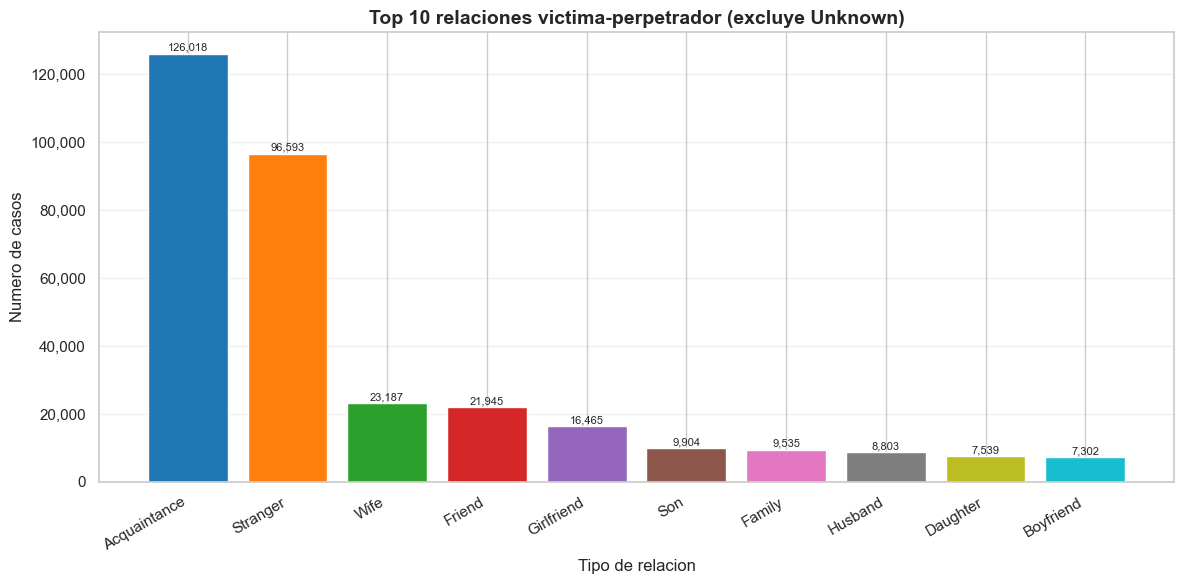

In [27]:
relaciones = df[df["Relationship"] != "Unknown"]["Relationship"].value_counts().head(10)

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(relaciones.index, relaciones.values,
              color=sns.color_palette("tab10", 10), edgecolor="white")
ax.set_title("Top 10 relaciones victima-perpetrador (excluye Unknown)", fontsize=14, fontweight="bold")
ax.set_xlabel("Tipo de relacion")
ax.set_ylabel("Numero de casos")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.xticks(rotation=30, ha="right")
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 300,
            f"{int(height):,}", ha="center", va="bottom", fontsize=8)
ax.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# <span style="color:Black;"><strong>5. Interpretaciones iniciales</strong></span>

<div style="background-color:#E6F4FF; padding:10px; border-radius:8px;">
<b>¿Qué tendencias o patrones básicos se observan?</b>
</div>

Basado en el análisis exploratorio del dataset de homicidios en Estados Unidos, se identifican los siguientes patrones fundamentales:

- **Concentración geográfica**: California y Texas concentran aproximadamente el 26% del total de homicidios (16% y 10% respectivamente), sugiriendo que la violencia homicida está altamente localizada en determinadas regiones.

- **Vulnerabilidad etaria definida**: La mayor parte de las víctimas registran edades entre 19 y 39 años, configurando un rango etario identificable.

- **Patrón de género en victimización**: El 77% de las víctimas son hombres, mientras que el 63% de los victimarios identificados también son hombres.

- **Asimetría en la identificación de victimarios**: No existe una inclinación clara respecto a factores específicos de los victimarios más allá del género masculino predominante. Esta limitación en la caracterización del perfil del agresor dificulta la formulación de hipótesis sobre motivaciones, contextos sociales o factores de riesgo del perpetrador.

---

<div style="background-color:#E8F5E9; padding:10px; border-radius:8px;">
<b>¿Qué limitaciones tiene la base de datos?</b>
</div>

La base de datos presenta varias limitaciones metodológicas importantes que deben considerarse en análisis posteriores:

1. **Sesgos de cobertura geográfica**: La sobrerrepresentación de estados como California y Texas puede deberse a diferencias en sistemas de reporte, disponibilidad de datos históricos o variaciones en protocolos de registro entre jurisdicciones. Esto limita la generalización de hallazgos a nivel nacional.

2. **Información incompleta sobre victimarios**: El análisis revela que hay una caracterización limitada del perfil del victimario más allá del género. Faltan variables contextuales sobre motivación, antecedentes criminales o relación con la víctima.

3. **Sesgo potencial en casos resueltos**: La variable "Crime Solved" puede estar correlacionada con características demográficas de víctimas (posible sesgo)

4. **Falta de contexto socioeconómico**: La base de datos no incluye indicadores de pobreza, desempleo, densidad poblacional, acceso a servicios o variables socioeconómicas que podrían explicar la concentración geográfica observada.

---

<div style="background-color:#FFF9C4; padding:10px; border-radius:8px;">
<b>¿Qué hipótesis iniciales podrían plantearse para análisis posteriores?</b>
</div>

Con base en los patrones observados, se proponen las siguientes hipótesis para investigaciones futuras:

**Hipótesis geográficas:**
- La concentración de homicidios en California y Texas está asociada a factores estructurales (densidad poblacional, desigualdad económica) más que a factores coyunturales, lo que requeriría análisis comparativos entre estados.

**Hipótesis demográficas:**
- El patrón intra-género (hombres victimizando hombres en 63% de casos) está vinculado a dinámicas de violencia relacionada con conflictos de poder, territorios u organizaciones específicas, diferenciándose de otras formas de violencia interpersonal.
- El rango etario 19-39 años representa la población económicamente activa y potencialmente involucrada en dinámicas de conflicto (laborales, sociales, criminales) que elevan el riesgo de victimización.
- Las características demográficas de víctimas y perpetradores pueden estar correlacionadas (proximidad geográfica, grupo racial/étnico similar), sugiriendo homicidios comunitarios o criminalidad localizada.


---

<div style="background-color:#FFE0E0; padding:10px; border-radius:8px;">
<b>Alertas de calidad de datos identificadas en el analisis exploratorio</b>
</div>

Durante la revision del dataset se identificaron las siguientes alertas que deben considerarse al interpretar cualquier resultado:

**Alerta 1 - Valores faltantes enmascarados como "Unknown"**  
El reporte `Series([], dtype: int64)` en el conteo de nulos es engañoso. El dataset no usa `NaN` para datos faltantes sino el string `"Unknown"`, que Pandas interpreta como valor valido. Esto afecta especialmente las columnas del perpetrador (`Perpetrator Race`, `Perpetrator Sex`, `Relationship`, `Weapon`), consistente con el volumen de crimenes no resueltos.

**Alerta 2 - `Perpetrator Age` con tipo mixto (object)**  
La columna `Perpetrator Age` mezcla strings como `"Unknown"` y valores numericos, por eso Pandas la carga como `object` y es clasificada como categorica. Cualquier operacion aritmetica requiere conversion previa

**Alerta 3 - Valores centinela en edades**  
`Victim Age` tiene un maximo de 998 y `Perpetrator Age` registra valores de 0, ambos códigos de datos desconocidos y no edades reales. Estos valores contaminan el promedio de 35 años reportado; al filtrarlos (rango 1-99) el perfil etario real de las victimas cambia ligeramente.

**Alerta 4 - `Incident` con valores hasta 999**  
El valor 999 en `Incident` es tipico marcador de codigo de error en registros administrativos del FBI. No debe interpretarse como una variable continua sin validacion previa de su significado real.

**Alerta 5 - `Victim Count` y `Perpetrator Count` con mayoria de ceros**  
El 75% de los registros tiene 0 en ambas columnas, también se interpretan como códigos de datos desconocidos.

**Alerta 6 - Porcentajes de genero calculados sobre universo completo**  
Las cifras "77% de victimas son hombres" y "63% de victimarios son hombres" incluyen en el denominador los registros `Unknown`. Al excluirlos, la proporcion de perpetradores masculinos identificados seria notablemente mayor, cambiando la magnitud de la disparidad reportada.


# <span style="color:Black;"><strong>6. Conclusión</strong></span>

El análisis exploratorio de la base de datos de homicidios en Estados Unidos permitió identificar patrones geográficos y demográficos relevantes. Se evidenció una concentración significativa en estados como California y Texas, y un perfil predominante de víctimas masculinas en edades productivas.

Las limitaciones identificadas —particularmente la ausencia de variables socioeconómicas y los sesgos de cobertura geográfica— requieren atención en análisis posteriores para comprender mejor los factores estructurales asociados a la violencia homicida.

Este primer acercamiento establece bases sólidas para investigaciones futuras que integren datos contextuales adicionales.

# <span style="color:Black;"><strong>7. Referencias</strong></span>

### **Fuente de los datos**
- Dataset: **Homicide Data Set**
  **Repositorio:** [Homicide](https://www.kaggle.com/code/harshilahalpara/homicide).  
  **Autores:** HARSHIL AHALPARA.  
  **Descripción:** Homicide Reports, 1980-2014.